### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2022-01-03,482017,5449850,827975,619473,299581,149367,137786,305096,125200,112584,89573,130061,131702,4849,202818
2022-01-04,482551,5457604,830132,619654,299711,149417,138045,305906,125551,112929,89689,130100,131736,4849,202867
2022-01-05,482876,5465352,832118,619654,299842,149761,138276,306710,125797,113373,89837,130140,131778,4849,202904
2022-01-06,483178,5472566,833988,619654,299970,149993,138474,307488,126002,113636,89837,130191,131802,4849,202934
2022-01-07,483463,5479804,836603,619654,300101,150223,138697,308258,126202,113905,89934,130250,131821,4849,202981


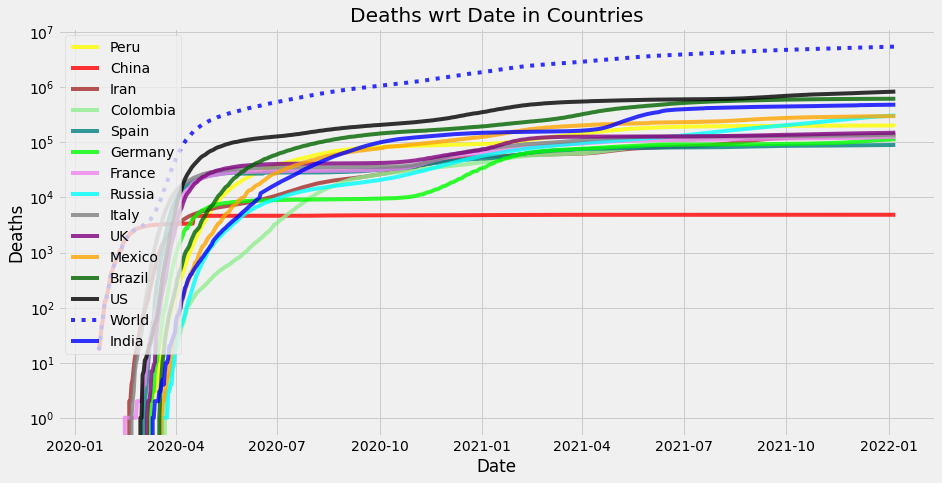

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2022-01-03,37379,2522558,1171378,11654,2877,187864,68034,16193,67489,50013,372766,9848,1677,188,1996
2022-01-04,58097,2540890,799189,19171,15184,225760,170837,15760,271974,61905,117775,12353,1706,104,5182
2022-01-05,90928,2506963,623308,0,20626,195235,189088,15632,332308,67337,137180,16259,1171,207,8687
2022-01-06,117100,2519837,786824,0,25821,182240,219430,15179,262898,59110,0,23039,1579,198,11174
2022-01-07,141986,2879121,900832,0,28023,180066,108297,16608,333317,52621,242440,26190,1178,176,12833


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2022-01-03,14058,1053753,300159,6528,3819,115211,54634,24843,93797,34316,63203,4982,2410,147,2323
2022-01-04,16994,1152895,333427,7371,4577,122581,62381,24238,105675,36155,66841,5473,2363,144,2514
2022-01-05,21923,1243166,352753,6879,5647,127425,70828,23664,120784,38234,71530,6192,2284,148,2925
2022-01-06,28268,1328278,381691,6421,6992,131079,80735,23098,130258,39626,66761,7315,2237,151,3475
2022-01-07,35849,1431667,416300,5993,8394,134345,82572,22666,143796,40492,78473,8574,2166,153,4099


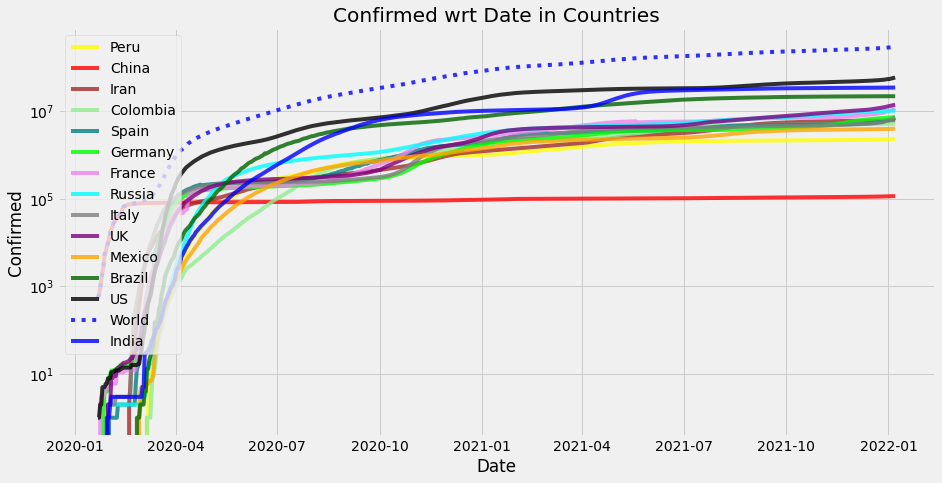

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2022-01-03,124,5865,1688,72,37,43,140,812,270,423,168,35,22,0,36
2022-01-04,534,7754,2157,181,130,50,259,810,351,345,116,39,34,0,49
2022-01-05,325,7748,1986,0,131,344,231,804,246,444,148,40,42,0,37
2022-01-06,302,7214,1870,0,128,232,198,778,205,263,0,51,24,0,30
2022-01-07,285,7238,2615,0,131,230,223,770,200,269,97,59,19,0,47


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2022-01-03,271.27,5950.41,1177.75,94.50,118.78,114.39,135.90,911.28,172.29,261.98,55.55,40.51,41.77,0.0,42.19
2022-01-04,304.11,6175.86,1300.15,105.31,120.18,106.34,151.29,898.62,194.63,272.36,63.10,40.32,40.79,0.0,43.04
2022-01-05,306.73,6372.38,1385.88,92.15,121.53,136.05,161.25,886.79,201.05,293.81,73.72,40.28,40.95,0.0,42.29
2022-01-06,306.13,6477.58,1446.40,80.63,122.34,148.04,165.85,873.19,201.55,289.96,64.50,41.62,38.83,0.0,40.75
2022-01-07,303.49,6572.63,1592.47,70.55,123.42,158.29,172.99,860.29,201.35,287.34,68.56,43.79,36.35,0.0,41.53


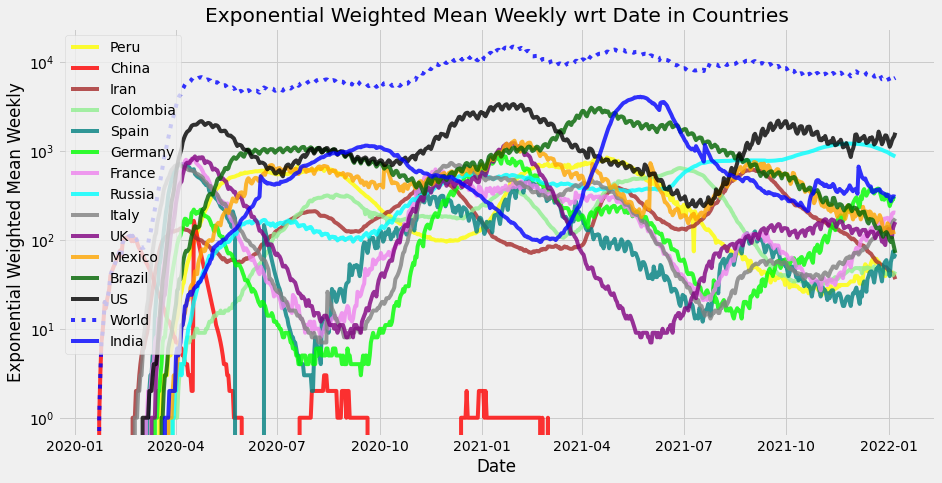

In [18]:
plotter(np.round(AVG), name)

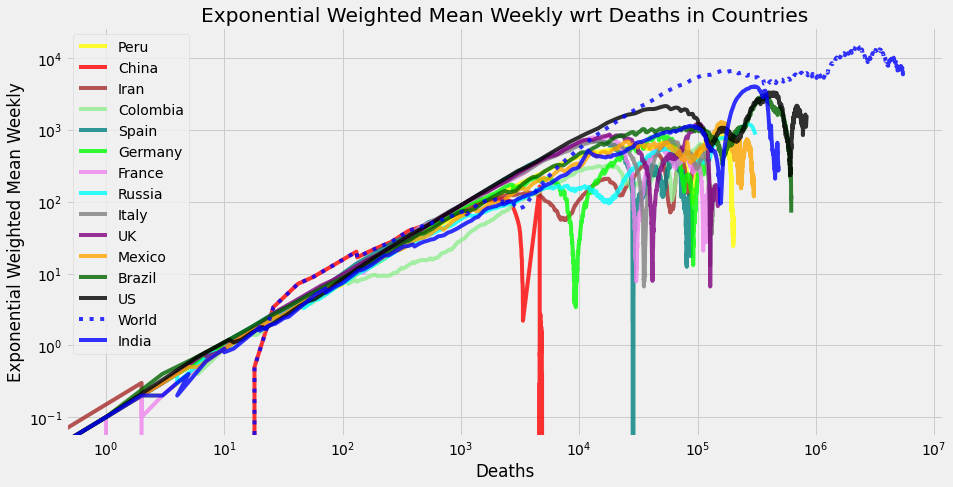

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

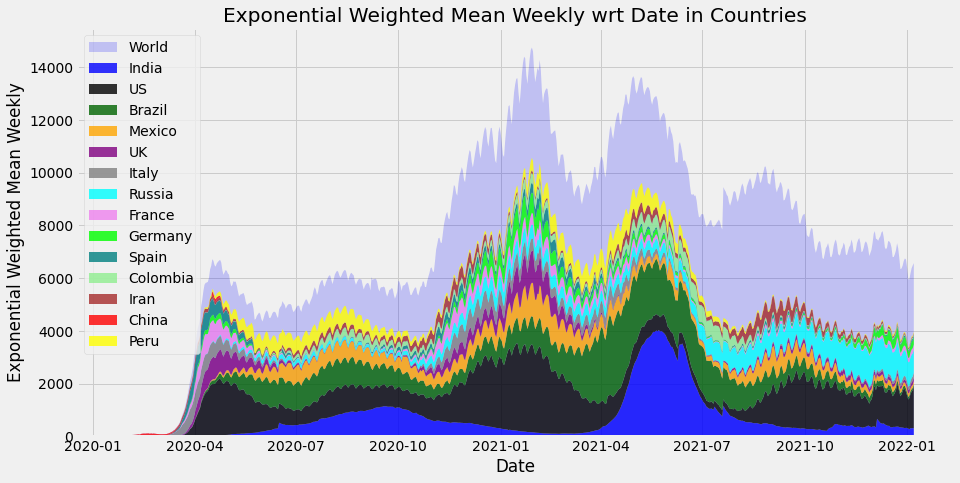

In [20]:
stackplotter(AVG, name)

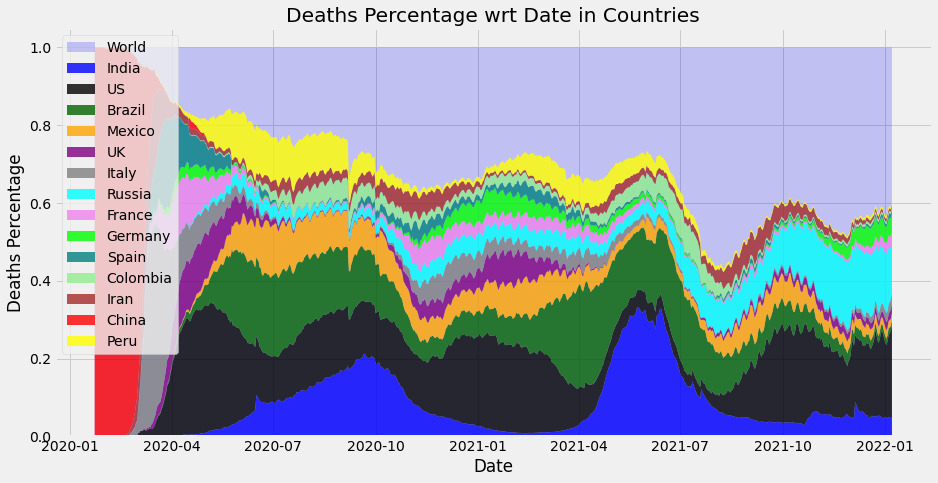

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

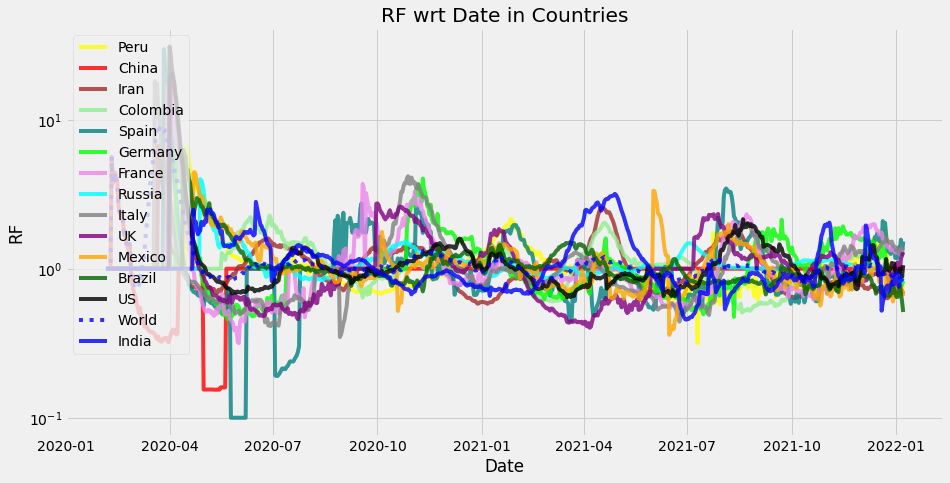

In [23]:
plotter(Reproductivity, 'RF')

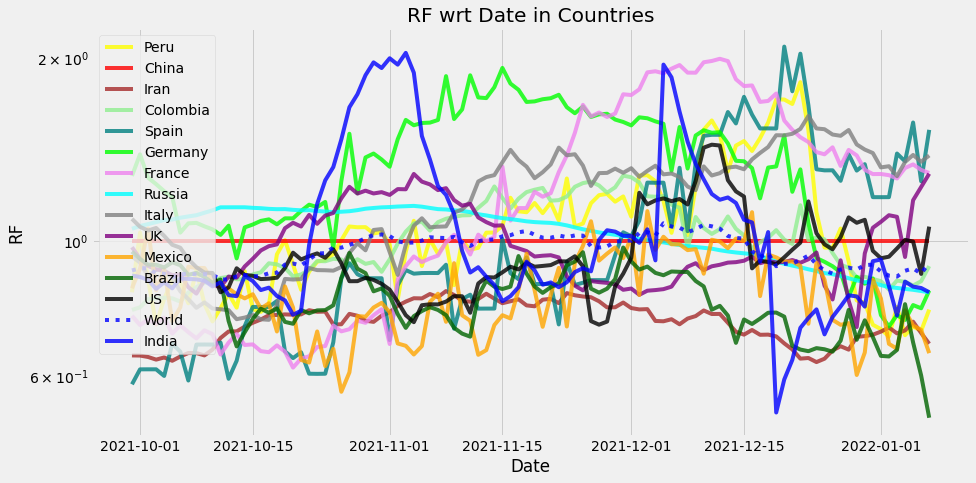

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

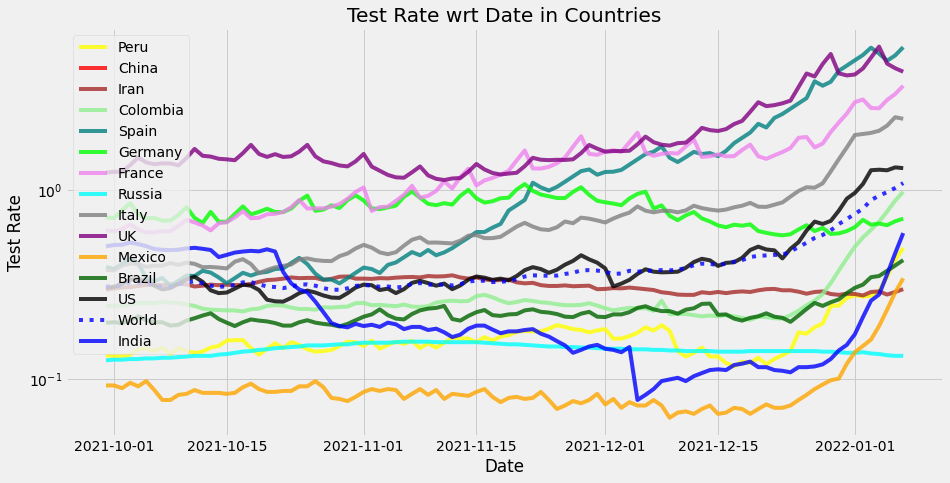

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

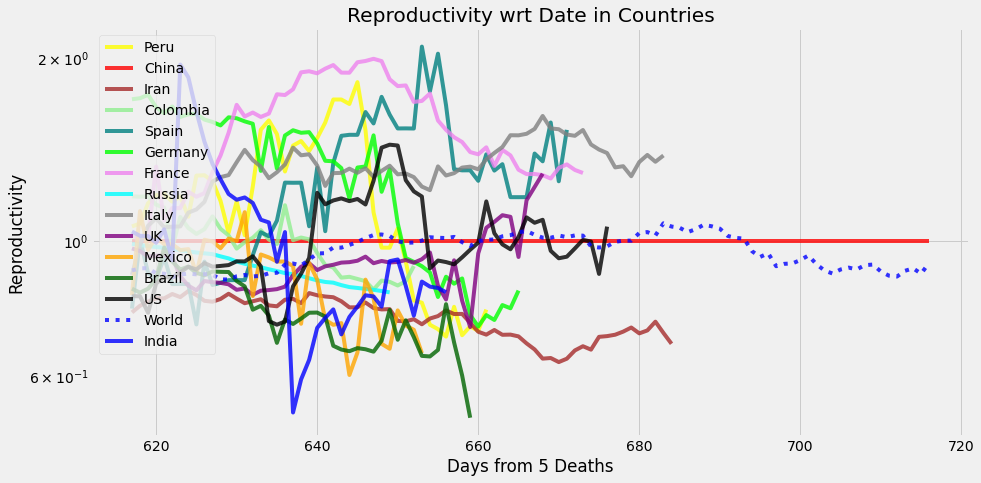

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

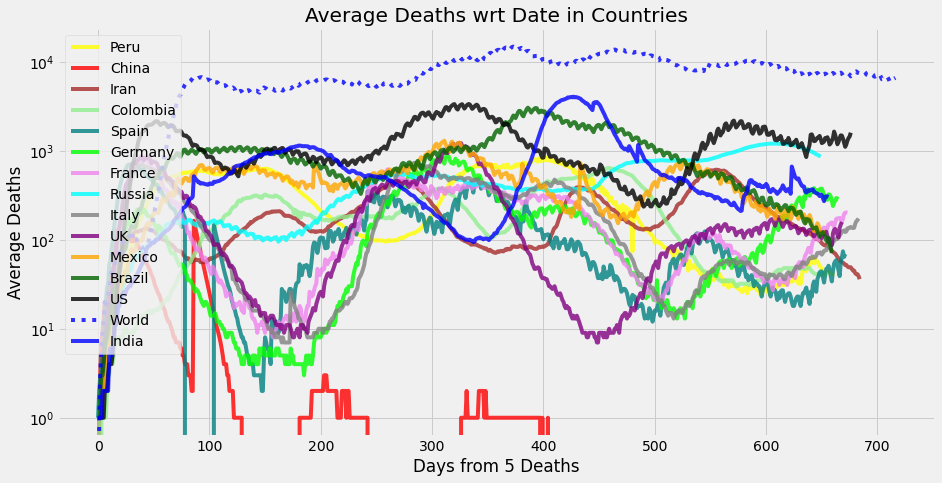

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

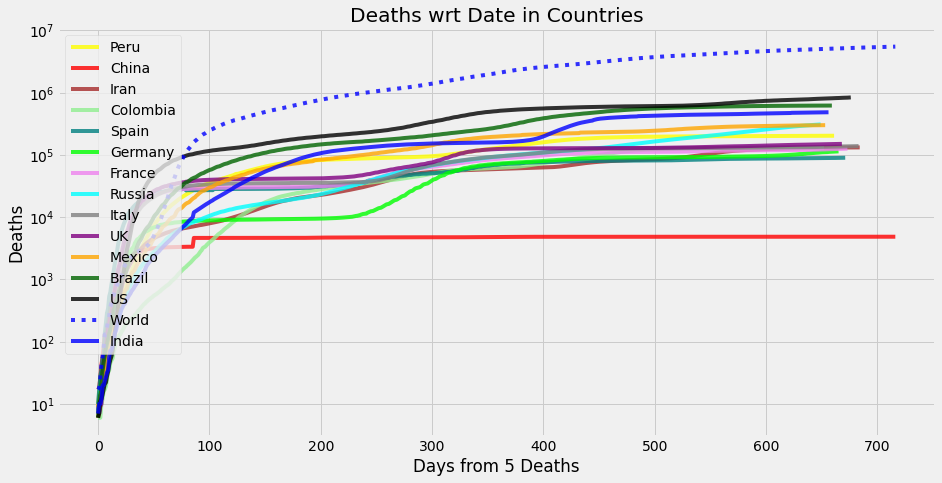

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5479804,7238,6135.14,6572.63,0.9216,303169398,1.089,1431667,1095.96
US,836603,2615,1546.71,1592.47,1.0562,59388529,1.307,416300,167.32
Brazil,619654,0,45.71,70.55,0.5123,22328252,0.425,5993,123.93
India,483463,285,282.43,303.49,0.8240,35368372,0.591,35849,96.69
Russia,308258,770,798.14,860.29,0.8236,10437471,0.132,22666,61.65
Mexico,300101,131,96.14,123.42,0.6542,4083118,0.340,8394,60.02
Peru,202981,47,41.57,41.53,0.7715,2342550,0.493,4099,40.60
UK,150223,230,161.00,158.29,1.2905,14280816,4.244,134345,30.04
Indonesia,144121,5,3.86,5.58,1.0000,4265187,NaN,281,28.82


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5479804,7238,6135.14,6572.63,0.9216,303169398,1.089,1431667,1095.96
US,836603,2615,1546.71,1592.47,1.0562,59388529,1.307,416300,167.32
Russia,308258,770,798.14,860.29,0.8236,10437471,0.132,22666,61.65
Poland,99428,117,339.14,402.56,0.8567,4191193,0.179,14373,19.89
India,483463,285,282.43,303.49,0.8240,35368372,0.591,35849,96.69
Germany,113905,269,256.29,287.34,0.8291,7499776,0.705,40492,22.78
Vietnam,33877,233,211.86,221.01,0.9417,1859841,0.379,16745,6.78
France,126202,200,210.43,201.35,1.2941,11623327,3.571,143796,25.24
Ukraine,103434,209,192.29,230.20,0.6859,3877032,0.139,6392,20.69


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5479804


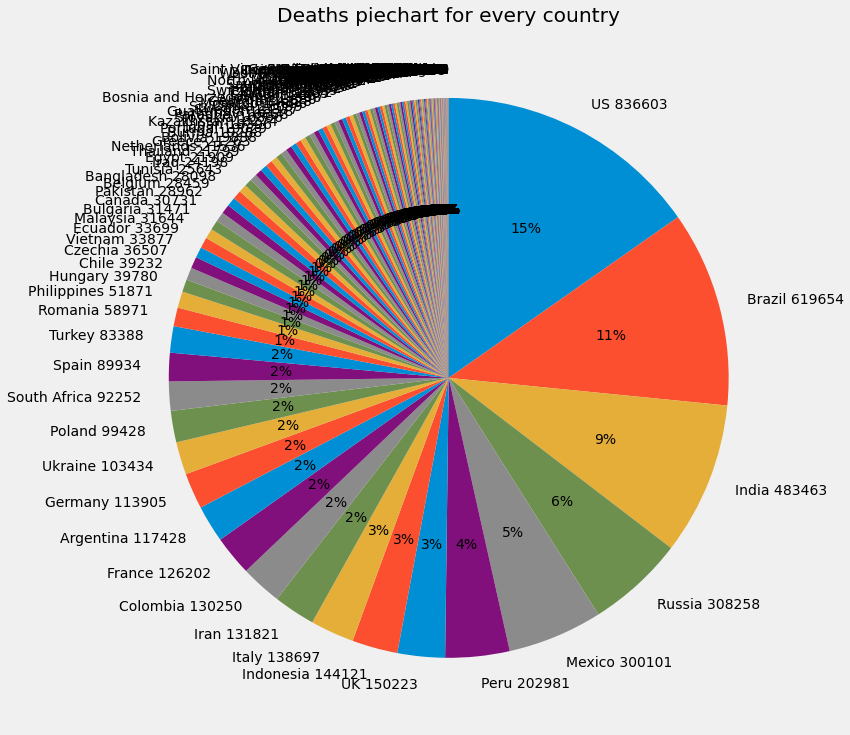

In [35]:
piechart('Deaths')

World total:  6135


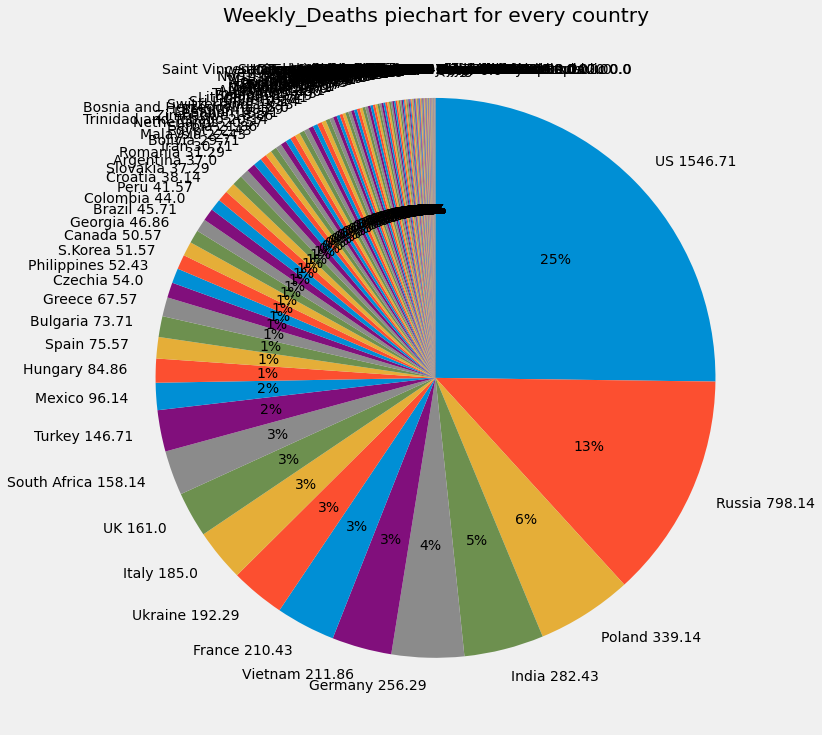

In [36]:
piechart('Weekly_Deaths')

World total:  7238


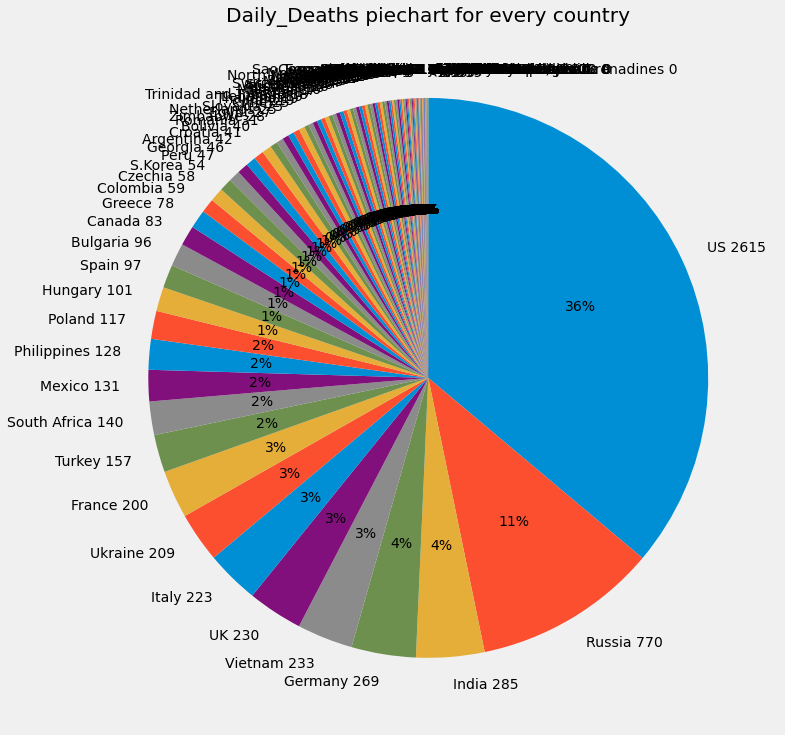

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2022-01-08


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1095960800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 0ff95f6] `date` update
 1 file changed, 2125 insertions(+), 2125 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (66%)


To https://github.com/Arrowheadahp/COVID-19.git
   71c490d..0ff95f6  master -> master
